## Perceptron for Logistic Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Read csv files containing mango (ripe and unripe) features

In [3]:
ripe1 = pd.read_csv('ripemango_features.csv')
ripe2 = pd.read_csv('ripemango_features_.csv')
unripe = pd.read_csv('unripemango_features.csv')

In [4]:
ripe = ripe1.append(ripe2,ignore_index=True)
ripe = ripe.drop(columns='Unnamed: 0')

### Thresholding Function

In [5]:
def sigmoid(a):
    return 1/(1+np.exp(-a))

## Perceptron Algorithm

In [6]:
def perceptron(weight,learning_rate,d,sample):
    features = np.array([1,sample['r'],sample['g'],sample['b']])
    
    a = np.sum(features*weight)
    z = sigmoid(a)
    
    checker = d-z
    delta_w = learning_rate*checker*features
    weight += delta_w
    
    return checker,weight,a,z

## Apply Perceptron Algorithm to All Samples

In [7]:
def iterations(class1,class2,learning_rate,error_threshold):
    weights = np.random.random(4)
    d1 = 1 #ripe
    d2 = 0 #unripe

    while True:
        probs1 = []
        probs2 = []
        a_vals1 = []
        a_vals2 = []
        error_sum = 0

        for i in range(len(class1)):
            sample = class1.iloc[i]
            checker,weights,a,z = perceptron(weights,learning_rate,d1,sample)
            error_sum += checker**2
            probs1.append(z)
            a_vals1.append(a)

        for j in range(len(class2)):
            sample = class2.iloc[j]
            checker,weights,a,z = perceptron(weights,learning_rate,d2,sample)
            error_sum += checker**2
            probs2.append(z)
            a_vals2.append(a)
            
        if error_sum < error_threshold:
                break
    
    return weights,probs1,probs2,a_vals1,a_vals2

## Perform Regression on Test Images

In [9]:
def regression(weight,sample):
    features = np.array([1,sample['r'],sample['g'],sample['b']])
    
    a = np.sum(features*weight)
    z = sigmoid(a)
    
    return a,z

## Applying Perceptron Algorithm to Differentiate Ripe vs Unripe Mangoes

In [8]:
weights,probabilities1,probabilities2,a_values1,a_values2 = iterations(ripe,unripe,0.1,0.1)

## Plot of p-vlaues of ripe and unripe mango training set along a sigmoid function

In [10]:
a_vals = np.linspace(-10,10)
p_vals = sigmoid(a_vals)

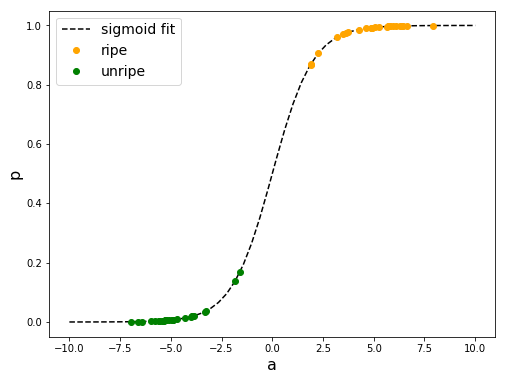

In [11]:
plt.figure(figsize=(8,6))

plt.plot(a_vals,p_vals,'k--',label='sigmoid fit')
plt.plot(a_values1,probabilities1,'o',color='orange',label='ripe')
plt.plot(a_values2,probabilities2,'go',label='unripe')
plt.xlabel('a',fontsize=16)
plt.ylabel('p',fontsize=16)
plt.legend(fontsize=14)
# plt.savefig('sigmoid.png',dpi=300,bbox_inches='tight')
plt.show()

## Applying logistic regression to test images

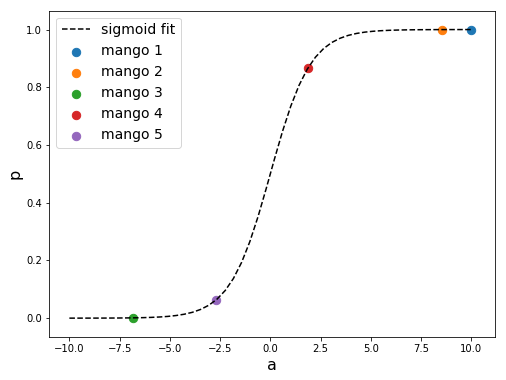

In [12]:
plt.figure(figsize=(8,6))
plt.plot(a_vals,p_vals,'k--',label='sigmoid fit')

for i in range(5):
    mango_features = pd.read_csv('mango'+str(i+1)+'_features.csv')
    a,z = regression(weights,mango_features)
    
#     print(a,z)
    plt.scatter(a,z,s=70,label='mango '+str(i+1))

plt.xlabel('a',fontsize=16)
plt.ylabel('p',fontsize=16)
plt.legend(fontsize=14)

# plt.savefig('trial_sigmoid.png',dpi=300,bbox_inches='tight')
plt.show()